___

<a href='https://mainacademy.ua/'> <img src='https://mainacademy.ua/wp-content/uploads/2019/03/logo-main.png' alt = 'Хмм, щось з інтернетом'/></a>
___

# Module 7: Supervised learning

## Lab work 7



#### Мета: 

* навчитися використовувати моделі з учителем

### Завдання 1:

Для цього завдання ми будемо вивчати загальнодоступні дані з [LendingClub.com](www.lendingclub.com). 

Кредитний клуб пов'язує людей, яким потрібні гроші (позичальники), та людей, які мають гроші (інвесторів). Сподіваємось, як інвестор ви хотіли б інвестувати в людей, які продемонстрували, що вони мають високу ймовірність повернути вам гроші. Ми спробуємо створити модель, яка допоможе це передбачити.

Кредитний клуб мав [дуже цікавий 2016 рік](https://en.wikipedia.org/wiki/Lending_Club#2016), тож давайте перевіримо деякі їх дані.

Ми використовуватимемо дані про позики за 2007-2010 роки та намагатимемося класифікувати та прогнозувати, чи повертав позичальник їх повністю.

Ось що представляють стовпці:
* `credit.policy`: 1, якщо клієнт відповідає критеріям андеррайтингу кредитів LendingClub.com, і 0 в іншому випадку.

* `purpose`: мета позики (приймає значення "кредитна_карта", "консолідація боргу", "освітня", "основна_покупка", "малий бізнес" та "всі_інші").

* `int.rate`: процентна ставка позики, пропорційно (ставка 11% зберігатиметься як 0,11). Позичальникам, які LendingClub.com вважає більш ризикованими, призначаються вищі процентні ставки.

* `installment`: щомісячні виплати позичальника, якщо позика фінансується.

* `log.annual.inc`: журнал річного доходу позичальника, який самостійно звітується.

* `dti`: відношення боргу до доходу позичальника (сума боргу, поділена на річний дохід).

* `fico`: кредитний рейтинг позичальника FICO.

* `days.with.cr.line`: кількість днів, коли позичальник мав кредитну лінію.

* `revol.bal`: кредитний залишок позичальника (сума не виплачена в кінці циклу виставлення рахунків за кредитною карткою).

* `revol.util`: коефіцієнт використання кридитної лінії позичальника (сума використаної кредитної лінії відносно загальної кількості доступних кредитів).

* `inq.last.6mths`: кількість запитів позичальників з боку кредиторів за останні 6 місяців.

* `delinq.2yrs`: кількість разів, протягом яких позичальник прострочував платежі протягом останніх 2 років понад 30 днів.

* `pub.rec`: кількість публічних записів (заяви про банкрутство, податкова застава або рішення).

Алгоритм виконання та проміжні завдання:
1. Відкрийте файл та виведіть описову статистику

2. Створіть дві гістограми по полю fico (перша для значень not.fully.paid=0, друга = 1). Гістограми накладіть одна на одну.

3. Відобразіть тенденцію між оцінкою fico та int.rate. Використайте jointplot

4. Побудуйте графік lmplot на основі int.rate та fico. Коліром розідліть по полю credit.policy. Розбийте по значеннях цільової функції

5. purpose є категорієї, тому варто перетворити за допомогою pd.get_dummies

6. Розбийте датасет на тестві та трейнові дані

7. Використайте для задачі класифікації такі моделі: дерево рішень, логістична регресія, random forest, XGBoost

8. Для кожної з моделей виведіть матрицю, основні метрики

8. *Використейте бібіотеку dtreeviz для візуалізації (там, де актуально)

9. Використайте ансамбель voting для всіх моделей

10. Порівняйте результати моделей та зробіть висновки

In [46]:
import sklearn as sk, pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

ds = pd.read_csv('loan_data.csv')
ds.head(7)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
5,1,credit_card,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0
6,1,debt_consolidation,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,1


In [45]:
# 1. Відкрийте файл та виведіть описову статистику
import sklearn as sk, pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

ds = pd.read_csv('loan_data.csv')

ds.describe()


,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


Text(0, 0.5, 'Clients qty')

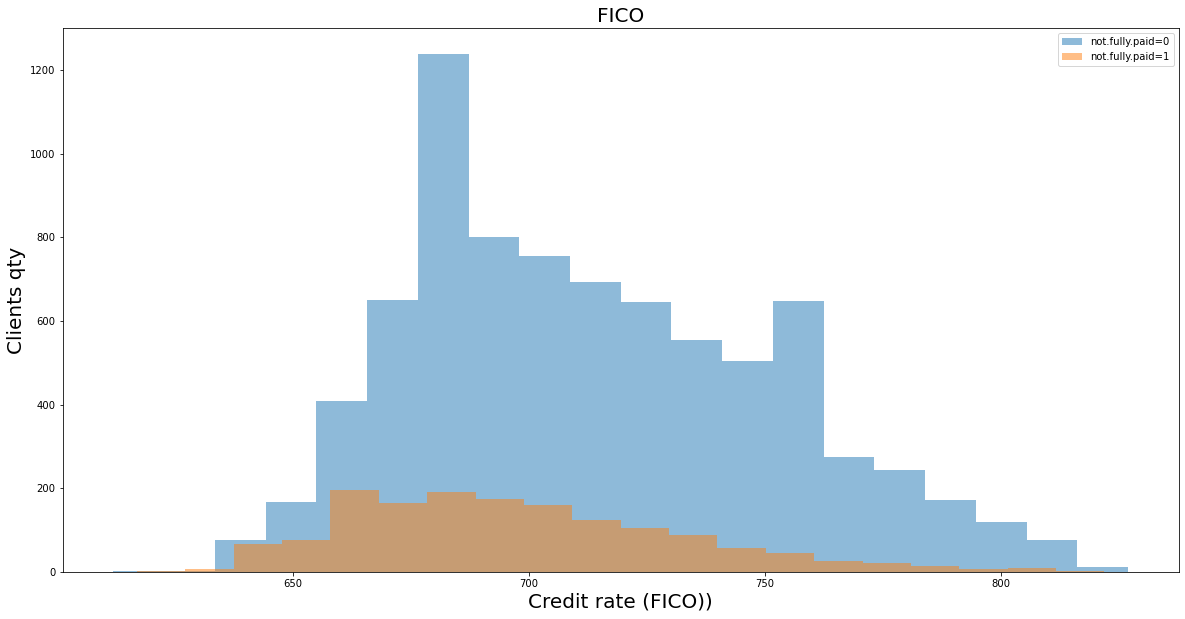

In [79]:
# 2. Створіть дві гістограми по полю fico (перша для значень not.fully.paid=0, друга = 1). Гістограми накладіть одна на одну
import matplotlib.pyplot as plt
import sklearn as sk, pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

ds = pd.read_csv('loan_data.csv')
ds0 = ds[ds["not.fully.paid"]==0].fico
ds1 = ds[ds["not.fully.paid"]==1].fico

fig, axs = plt.subplots(1, 1, figsize=(20, 10))

plt.hist(ds0, bins=20, alpha=0.5, label='not.fully.paid=0')
plt.hist(ds1, bins=20, alpha=0.5, label='not.fully.paid=1')
plt.legend(prop={'size': 10})
axs.set_title('FICO', size=20)
axs.set_xlabel('Credit rate (FICO))', size=20)
axs.set_ylabel('Clients qty', size=20)

Pearson coeff: (-0.7148207714193595, 0.0)
Высокая обратная корреляционная связь - чем выше рейтинг, тем ниже процентная ставка


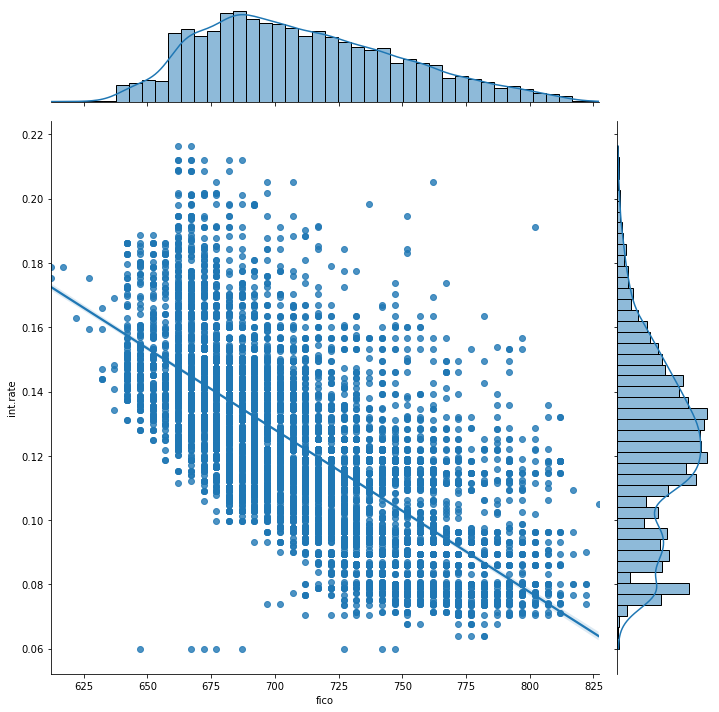

In [105]:
# 3. Відобразіть тенденцію між оцінкою fico та int.rate. Використайте jointplot
import matplotlib.pyplot as plt
import sklearn as sk, pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import scipy.stats as stat
from warnings import filterwarnings

#this will help ignore warnings
filterwarnings ('ignore')

ds = pd.read_csv('loan_data.csv')

j = sns.jointplot(data=ds, x="fico", y="int.rate", kind="reg", height = 10) # , hue="purpose"
print('Pearson coeff:', stat.pearsonr(ds.fico, ds['int.rate']))
print('Высокая обратная корреляционная связь - чем выше рейтинг, тем ниже процентная ставка')

Pearson coeff(credit.policy==0): (-0.5136313869841969, 2.8363121427419523e-126)
Pearson coeff(credit.policy==1): (-0.7209641864845991, 0.0)
Видно, що для клієнтів, котрі відповідають критеріям андеррайтингу кредитів LendingClub.com, зниження процентів більш явне 


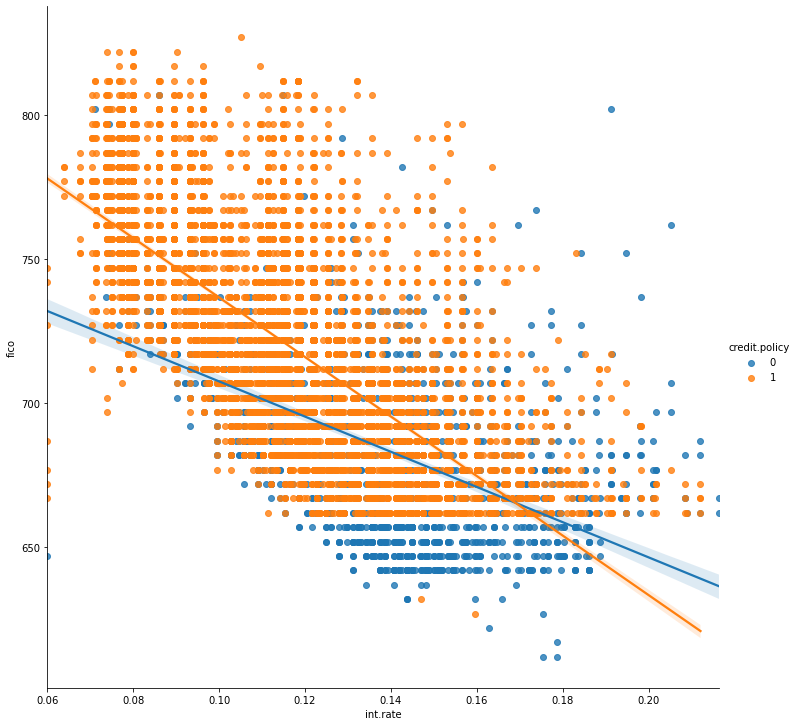

In [110]:
# 4. Побудуйте графік lmplot на основі int.rate та fico. Коліром розідліть по полю credit.policy. 
# Розбийте по значеннях цільової функції
import matplotlib.pyplot as plt
import sklearn as sk, pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import scipy.stats as stat
from warnings import filterwarnings

#this will help ignore warnings
filterwarnings ('ignore')

ds = pd.read_csv('loan_data.csv')

sns.lmplot("int.rate", "fico", ds, hue='credit.policy', height = 10)
print('Pearson coeff(credit.policy==0):', stat.pearsonr(ds[ds['credit.policy']==0].fico, ds[ds['credit.policy']==0]['int.rate']))
print('Pearson coeff(credit.policy==1):', stat.pearsonr(ds[ds['credit.policy']==1].fico, ds[ds['credit.policy']==1]['int.rate']))
print('Видно, що для клієнтів, котрі відповідають критеріям андеррайтингу кредитів LendingClub.com, зниження процентів більш явне ')

In [112]:
# 5. purpose є категорієї, тому варто перетворити за допомогою pd.get_dummies
import matplotlib.pyplot as plt
import sklearn as sk, pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import scipy.stats as stat
from warnings import filterwarnings

#this will help ignore warnings
filterwarnings ('ignore')

ds = pd.read_csv('loan_data.csv')
ds = pd.get_dummies(ds, columns = ['purpose'])
ds

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,0,0,0,0,1,0,0


In [37]:
%%time
# 6. Розбийте датасет на тестві та трейнові дані
# 7.1 логістична регресія
import matplotlib.pyplot as plt
import sklearn as sk, pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import scipy.stats as stat
from warnings import filterwarnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import metrics

#this will help ignore warnings
filterwarnings ('ignore')

ds = pd.read_csv('loan_data.csv')
ds = pd.get_dummies(ds, columns = ['purpose'])

#y = ds["credit.policy"]
#X = ds.drop('credit.policy',axis=1)
y = ds["not.fully.paid"]
X = ds.drop('not.fully.paid',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

logmodel = LogisticRegression()

logmodel.fit(X_train,y_train)

# accuracy - % правильно "вгаданих" значень 
print('Score на трейні', logmodel.score(X_train,y_train))

print('Score на тесті', logmodel.score(X_test,y_test))

print('confusion_matrix:')
y_predictions = logmodel.predict(X_test)

print(np.flip(metrics.confusion_matrix(y_test,y_predictions)))
print(metrics.classification_report(y_test,y_predictions))

Score на трейні 0.8413588904472495
Score на тесті 0.8370768744068333
confusion_matrix:
[[   3  509]
 [   6 2643]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2649
           1       0.33      0.01      0.01       512

    accuracy                           0.84      3161
   macro avg       0.59      0.50      0.46      3161
weighted avg       0.76      0.84      0.77      3161

Wall time: 1.09 s
Parser   : 105 ms


<AxesSubplot:xlabel='fico', ylabel='not.fully.paid'>

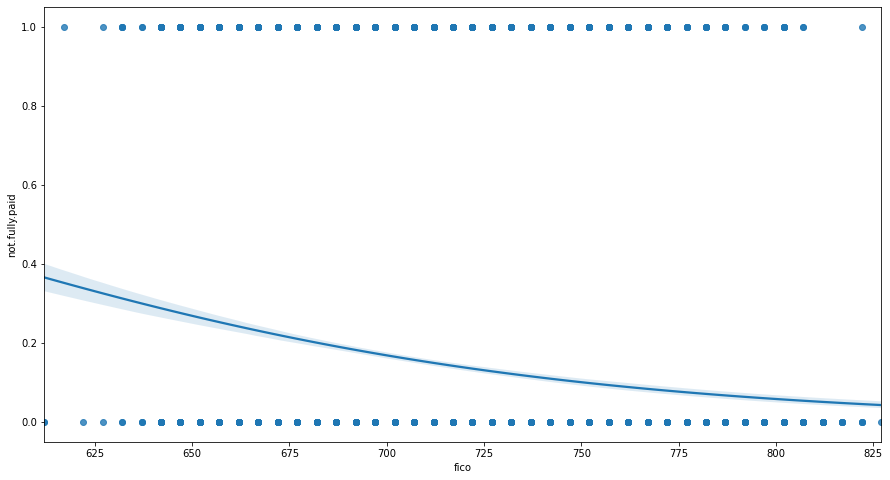

In [38]:
# 7. Використайте для задачі класифікації такі моделі: дерево рішень, логістична регресія, random forest, XGBoost
import matplotlib.pyplot as plt
import sklearn as sk, pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import scipy.stats as stat
from warnings import filterwarnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
# classifier = DecisionTreeClassifier()
# classifier.fit(X_train, y_train)

#this will help ignore warnings
filterwarnings ('ignore')

ds = pd.read_csv('loan_data.csv')
ds = pd.get_dummies(ds, columns = ['purpose'])

plt.figure(figsize=(15,8))
#sns.regplot(x='fico', y='credit.policy', data=ds, logistic=True)
sns.regplot(x='fico', y='not.fully.paid', data=ds, logistic=True)

In [39]:
%%time
# 7. Використайте для задачі класифікації такі моделі: дерево рішень, логістична регресія, random forest, XGBoost
# 7.2 дерево рішень

import matplotlib.pyplot as plt
import sklearn as sk, pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import scipy.stats as stat
from warnings import filterwarnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

#this will help ignore warnings
filterwarnings ('ignore')

ds = pd.read_csv('loan_data.csv')
ds = pd.get_dummies(ds, columns = ['purpose'])

#y = ds["credit.policy"]
#X = ds.drop('credit.policy',axis=1)
y = ds["not.fully.paid"]
X = ds.drop('not.fully.paid',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

print('Score на трейні', classifier.score(X_train,y_train))

print('Score на тесті', classifier.score(X_test,y_test))

print('confusion_matrix:')
y_predictions = classifier.predict(X_test)

print(np.flip(metrics.confusion_matrix(y_test,y_predictions)))
print(metrics.classification_report(y_test,y_predictions))

Score на трейні 1.0
Score на тесті 0.737424865548877
confusion_matrix:
[[ 107  405]
 [ 425 2224]]
              precision    recall  f1-score   support

           0       0.85      0.84      0.84      2649
           1       0.20      0.21      0.20       512

    accuracy                           0.74      3161
   macro avg       0.52      0.52      0.52      3161
weighted avg       0.74      0.74      0.74      3161

Wall time: 244 ms


In [40]:
%%time
# 7. Використайте для задачі класифікації такі моделі: дерево рішень, логістична регресія, random forest, XGBoost
# 7.3 random forest
import matplotlib.pyplot as plt
import sklearn as sk, pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import scipy.stats as stat
from warnings import filterwarnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

#this will help ignore warnings
filterwarnings ('ignore')

ds = pd.read_csv('loan_data.csv')
ds = pd.get_dummies(ds, columns = ['purpose'])

#y = ds["credit.policy"]
#X = ds.drop('credit.policy',axis=1)
y = ds["not.fully.paid"]
X = ds.drop('not.fully.paid',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

print('Score на трейні', classifier.score(X_train,y_train))

print('Score на тесті', classifier.score(X_test,y_test))

print('confusion_matrix:')
y_predictions = classifier.predict(X_test)

print(np.flip(metrics.confusion_matrix(y_test,y_predictions)))
print(metrics.classification_report(y_test,y_predictions))

Score на трейні 1.0
Score на тесті 0.835495096488453
confusion_matrix:
[[  10  502]
 [  18 2631]]
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2649
           1       0.36      0.02      0.04       512

    accuracy                           0.84      3161
   macro avg       0.60      0.51      0.47      3161
weighted avg       0.76      0.84      0.77      3161

Wall time: 2.02 s


In [41]:
%%time
# 7. Використайте для задачі класифікації такі моделі: дерево рішень, логістична регресія, random forest, XGBoost
# 7.4.1 XGBoost (by GradientBoostingClassifier)
import matplotlib.pyplot as plt
import sklearn as sk, pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import scipy.stats as stat
from warnings import filterwarnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
import xgboost as xgb 

#this will help ignore warnings
filterwarnings ('ignore')

ds = pd.read_csv('loan_data.csv')
ds = pd.get_dummies(ds, columns = ['purpose'])

#y = ds["credit.policy"]
#X = ds.drop('credit.policy',axis=1)
y = ds["not.fully.paid"]
X = ds.drop('not.fully.paid',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

classifier = GradientBoostingClassifier()
classifier.fit(X_train, y_train)

print('Score на трейні', classifier.score(X_train,y_train))

print('Score на тесті', classifier.score(X_test,y_test))

print('confusion_matrix:')
y_predictions = classifier.predict(X_test)

print(np.flip(metrics.confusion_matrix(y_test,y_predictions)))
print(metrics.classification_report(y_test,y_predictions))

Score на трейні 0.8552282998285803
Score на тесті 0.8386586523252135
confusion_matrix:
[[  17  495]
 [  15 2634]]
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2649
           1       0.53      0.03      0.06       512

    accuracy                           0.84      3161
   macro avg       0.69      0.51      0.49      3161
weighted avg       0.79      0.84      0.77      3161

Wall time: 1.96 s


In [5]:
import sys
!{sys.executable} -m pip install xgboost

  Using cached xgboost-1.5.1-py3-none-win_amd64.whl (106.6 MB)


In [42]:
%%time
# 7. Використайте для задачі класифікації такі моделі: дерево рішень, логістична регресія, random forest, XGBoost
# 7.4.2 XGBoost (by XGBRegressor)
import matplotlib.pyplot as plt
import sklearn as sk, pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import scipy.stats as stat
from warnings import filterwarnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
import xgboost as xgb 

#this will help ignore warnings
filterwarnings ('ignore')

ds = pd.read_csv('loan_data.csv')
ds = pd.get_dummies(ds, columns = ['purpose'])

#y = ds["credit.policy"]
#X = ds.drop('credit.policy',axis=1)
y = ds["not.fully.paid"]
X = ds.drop('not.fully.paid',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

# classifier = GradientBoostingClassifier()
# classifier.fit(X_train, y_train)

classifier = xgb.XGBClassifier(objective='reg:squarederror',
    n_estimators=1000,
    learning_rate=0.10,
    subsample=0.5,
    colsample_bytree=1, 
    max_depth=5,
)
classifier.fit(X_train, y_train)

print('Score на трейні', classifier.score(X_train,y_train))

print('Score на тесті', classifier.score(X_test,y_test))

print('confusion_matrix:')
y_predictions = classifier.predict(X_test)

#print(accuracy_score(y_true, y_pred.round(), normalize=False))

print(np.flip(metrics.confusion_matrix(y_test,y_predictions)))
print(metrics.classification_report(y_test,y_predictions))

Score на трейні 1.0
Score на тесті 0.8136665612148054
confusion_matrix:
[[  70  442]
 [ 147 2502]]
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      2649
           1       0.32      0.14      0.19       512

    accuracy                           0.81      3161
   macro avg       0.59      0.54      0.54      3161
weighted avg       0.76      0.81      0.78      3161

Wall time: 7.26 s


# 8. Для кожної з моделей виведіть матрицю, основні метрики
## ВИЩЕ У ПУНКТІ 7 У КОЖНОМУ ПІДПУНКТІ

In [21]:
import sys
!{sys.executable} -m pip install dtreeviz

  Using cached dtreeviz-1.3.2.tar.gz (62 kB)
  Using cached graphviz-0.19.1-py3-none-any.whl (46 kB)
  Using cached colour-0.1.5-py2.py3-none-any.whl (23 kB)
  Created wheel for dtreeviz: filename=dtreeviz-1.3.2-py3-none-any.whl size=67923 sha256=51bafc0600e5973e3844481b21c77d431955a64c6b84c61a00c6fe21fa5c122f
  Stored in directory: c:\users\paul\appdata\local\pip\cache\wheels\b7\44\95\93a3468ef218a345249de22ba72b4b534a7b9b2475e3a8fdb0
Successfully built dtreeviz


Размер выборок: (3161, 19) (6417, 19)
Правильность на обучающем наборе: 0.844
Правильность на тестовом наборе: 0.838


Важности признаков:
credit.policy 0.41
int.rate 0.25
installment 0.0
log.annual.inc 0.08
dti 0.0
fico 0.0
days.with.cr.line 0.0
revol.bal 0.0
revol.util 0.12
inq.last.6mths 0.1
delinq.2yrs 0.0
pub.rec 0.0
purpose_all_other 0.0
purpose_credit_card 0.0
purpose_debt_consolidation 0.0
purpose_educational 0.0
purpose_home_improvement 0.0
purpose_major_purchase 0.0
purpose_small_business 0.05
Wall time: 5.84 s


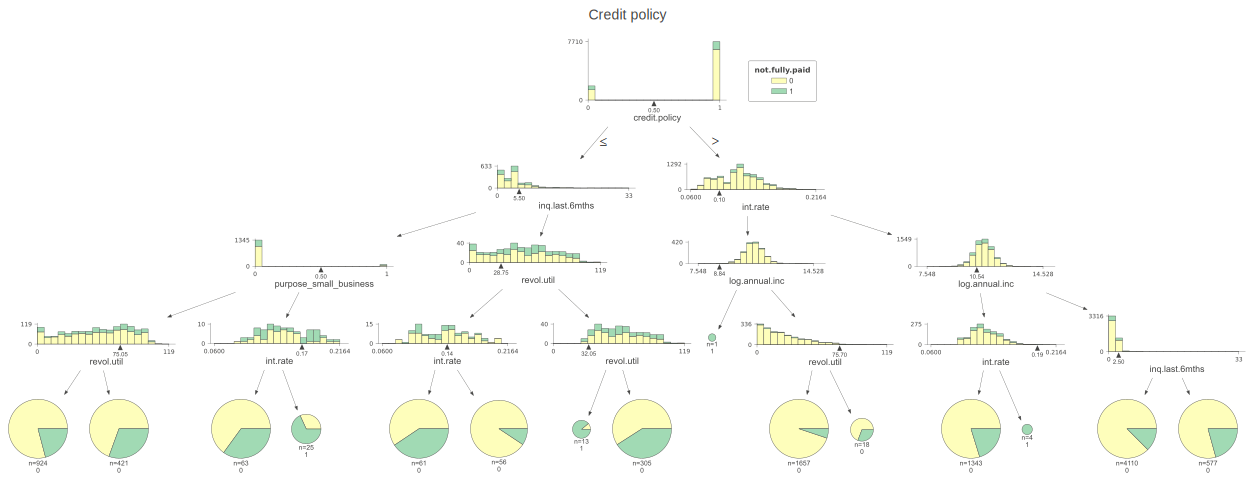

In [44]:
%%time
# 9. *Використейте бібіотеку dtreeviz для візуалізації (там, де актуально)
# DecisionTreeClassifier

import matplotlib.pyplot as plt
import sklearn as sk, pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import scipy.stats as stat
from warnings import filterwarnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from dtreeviz.trees import *

#this will help ignore warnings
filterwarnings ('ignore')

ds = pd.read_csv('loan_data.csv')
ds = pd.get_dummies(ds, columns = ['purpose'])

#y = ds["credit.policy"]
#X = ds.drop('credit.policy',axis=1)
y = ds["not.fully.paid"]
X = ds.drop('not.fully.paid',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

classifier = DecisionTreeClassifier(max_depth=4)
classifier.fit(X_train, y_train)

print("Размер выборок:", X_test.shape, X_train.shape)
print("Правильность на обучающем наборе: {:.3f}".format(classifier.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(classifier.score(X_test, y_test)))
print("\n")
print("Важности признаков:")
for name, score in zip(list(X_test.columns), classifier.feature_importances_):
    print(name, round(score, 2))

viz = dtreeviz(classifier, 
               x_data=X,
               y_data=y,
#               target_name='credit.policy',
               target_name='not.fully.paid',
               feature_names=X.columns, 
               class_names=list([0, 1]), 
               title="Credit policy")
viz


In [55]:
%%time
# 10. Використайте ансамбель voting для всіх моделей
from sklearn.ensemble import VotingClassifier
import matplotlib.pyplot as plt
import sklearn as sk, pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import scipy.stats as stat
from warnings import filterwarnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import xgboost as xgb 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

#this will help ignore warnings
filterwarnings ('ignore')

ds = pd.read_csv('loan_data.csv')
ds = pd.get_dummies(ds, columns = ['purpose'])

#y = ds["credit.policy"]
#X = ds.drop('credit.policy',axis=1)
y = ds["not.fully.paid"]
X = ds.drop('not.fully.paid',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
# дерево рішень, логістична регресія, random forest, XGBoost
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()
clf3 = RandomForestClassifier()
clf4 = xgb.XGBClassifier(objective='reg:squarederror',
    n_estimators=1000,
    learning_rate=0.10,
    subsample=0.5,
    colsample_bytree=1, 
    #max_depth=5,
)
params = { 'lr__C' : [0.5,1,1.5], 'lr__class_weight': [None,'balanced'],
           'dt__max_depth':[4, 7], 'rdt__max_depth':[4, 7], 'xgb__max_depth':[4, 7]} 
         #{'lr__C' : [0.5,1,1.5], 'lr__class_weight': [None,'balanced'],
         #     'nb__alpha' : [0.1,1,2], 
         #     'sgd__penalty' : ['l2', 'l1'], 'sgd__alpha': [0.0001,0.001,0.01],
         #     'kernel':('linear', 'rbf'), 
         #     'C':[1, 10]}
eclf = VotingClassifier(estimators=[ ('lr', clf1), ('dt', clf2),('rdt', clf3),('xgb', clf4)], voting='hard') # задаем метод голосования через большинство (hard voting)
clf = GridSearchCV(estimator=eclf, param_grid=params, cv=5, scoring='accuracy', n_jobs=-1)
clf.fit(X_train, y_train)
print('Best params', clf.best_params_)
for clf, label in zip([clf1, clf2, clf3, clf4, eclf], ['Logistic Regression', 'DecisionTreeClassifier', 'RandomForestClassifier', 'xgb.XGBClassifier', 'Ensemble_HardVoting']):
    scores = cross_val_score(clf, X_train, y_train, cv=4, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))


Best params {'dt__max_depth': 7, 'lr__C': 0.5, 'lr__class_weight': None, 'rdt__max_depth': 7, 'xgb__max_depth': 4}
Accuracy: 0.84 (+/- 0.00) [Logistic Regression]
Accuracy: 0.74 (+/- 0.01) [DecisionTreeClassifier]
Accuracy: 0.84 (+/- 0.00) [RandomForestClassifier]
Accuracy: 0.81 (+/- 0.01) [xgb.XGBClassifier]
Accuracy: 0.84 (+/- 0.00) [Ensemble_HardVoting]
Wall time: 27min 34s


In [ ]:
# 11. Порівняйте результати моделей та зробіть висновки
# Сделать графики моделей и объяснить увиденное (1-4 задание)? Для остальных пунктов - описать некоторые характеристики, 
# какая из моделей лучше и почему (какая из моделей может подходить лучше к поставленной задаче). GridSearch ещё для 
# чего-то использовать в данном случае.  


#### Пункт 2:
При анализе гистограммы зависимости низкой платёжной дисциплины (<u>not.paid.paid</u>) и кредитного рейтинга (<u>fico</u>) нельзя чётко сказать, что низкий кредитный рейтинг может спрогнозировать то, что клиент просрочет платёж. Видно, что клиенты с одинаковым кредитным рейтингом имеют похожее распределение и для дисциплинированных и для недисциплинированных клиентов, но вероятность того, что клиент с рейтингом fico выше среднего просрочет платёж, безусловно, значительно снижается.  

#### Пункт 3:
При сравнении и анализе графика (связь кредитного рейтинга и процентной ставки) можно сделать следующие выводы:
<br/>
<b>Pearson coeff:</b> (-0.7148207714193595, 0.0)
<br/>
Высокая обратная корреляционная связь - чем выше рейтинг, тем ниже процентная ставка

#### Пункт 4:
<br/>
<b>Pearson coeff(credit.policy==0):</b> (-0.5136313869841969, 2.8363121427419523e-126)
<br/>
<b>Pearson coeff(credit.policy==1):</b> (-0.7209641864845991, 0.0)
<br/>
Видно, що для клієнтів, котрі відповідають критеріям андеррайтингу кредитів LendingClub.com, зниження процентів більш явне 

#### Пункт 5 - 10:
После выполнения <u>пункта 10</u> (использование ансамля Voting) можно заметить, что, возможно, для модели Дерева Решений стоило использовать уровень вложенности > 4, т.к. рекомендуемый параметр из предложенных для неё указывается больше, в данном случае <b>7</b>.
Сравнительный анализ эффективности использованных моделей (их <b>score на тесте</b> и просмотр метрик) в общем совпадает и в условном ручном сравнении метрик и при сравнении моделей посредством <b>cross_val_score</b>. Модели <u>Logistic Regression</u> и <u>GradientBoostingClassifier</u> выделяются точностью своего <b>accuracy</b>, но окончательный выбор, полагаю, нужно оставить за <u>GradientBoostingClassifier</u>, т.к. она выигрывает по показателю <b>pression</b> для ситуации прогнозирования недисциплинированных клиентов - <b>0.53</b> против <b>0.33</b>

### Завдання 2:

Просте завдання на обробку часових рядів.

Потрібно вивести наступну інформацію: 
1. Виведіть список унікальних міст з датасету
2. Виведіть дату початку та кінця ведення даних
3. Яка середня конценрація $NO_2$ для кожного дня тижня і міста (виведіть таблицю)?
4. Яке середнє значення для кожної години (виведіть стовбчикову діаграму)?

In [82]:
import sys
!{sys.executable} -m pip install tabulate

In [7]:
url = "https://raw.githubusercontent.com/dm-fedorov/pandas_basic/master/%D0%B1%D1%8B%D1%81%D1%82%D1%80%D0%BE%D0%B5%20%D0%B2%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5%20%D0%B2%20pandas/data/air_quality_no2_long.csv"

,city,country,date.utc,location,parameter,value,unit,dw,hh
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³,Friday,0
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³,Thursday,23
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³,Thursday,22
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³,Thursday,21
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³,Thursday,20
5,Paris,FR,2019-06-20 19:00:00+00:00,FR04014,no2,25.3,µg/m³,Thursday,19
6,Paris,FR,2019-06-20 18:00:00+00:00,FR04014,no2,23.9,µg/m³,Thursday,18
7,Paris,FR,2019-06-20 17:00:00+00:00,FR04014,no2,23.2,µg/m³,Thursday,17
8,Paris,FR,2019-06-20 16:00:00+00:00,FR04014,no2,19.0,µg/m³,Thursday,16
9,Paris,FR,2019-06-20 15:00:00+00:00,FR04014,no2,19.3,µg/m³,Thursday,15


1. Виведіть список унікальних міст з датасету: ['Paris' 'Antwerpen' 'London']
2. Виведіть дату початку та кінця ведення даних: 07/05/2019 - 21/06/2019
3. Яка середня конценрація  𝑁𝑂2  для кожного дня тижня і міста (виведіть таблицю):


|                            |   value |
|:---------------------------|--------:|
| ('Friday', 'Antwerpen')    | 28.4    |
| ('Friday', 'London')       | 26.4468 |
| ('Friday', 'Paris')        | 31.618  |
| ('Monday', 'Antwerpen')    | 27.875  |
| ('Monday', 'London')       | 23.9697 |
| ('Monday', 'Paris')        | 24.8563 |
| ('Saturday', 'Antwerpen')  | 33.5    |
| ('Saturday', 'London')     | 24.9776 |
| ('Saturday', 'Paris')      | 25.2662 |
| ('Sunday', 'Antwerpen')    | 21.8966 |
| ('Sunday', 'London')       | 24.8592 |
| ('Sunday', 'Paris')        | 23.2743 |
| ('Thursday', 'Antwerpen')  | 27.5    |
| ('Thursday', 'London')     | 24.7801 |
| ('Thursday', 'Paris')      | 28.6007 |
| ('Tuesday', 'Antwerpen')   | 22.2143 |
| ('Tuesday', 'London')      | 24.8857 |
| ('Tuesday', 'Paris')       | 30.9994 |
| ('Wednesday', 'Antwerpen') | 21.125  |
| ('Wednesday', 'London')    | 23.4604 |
| ('Wednesday', 'Paris')     | 29.1658 |

4. Яке середнє значення для кожної години (виведіть стовбчикову діаграму):


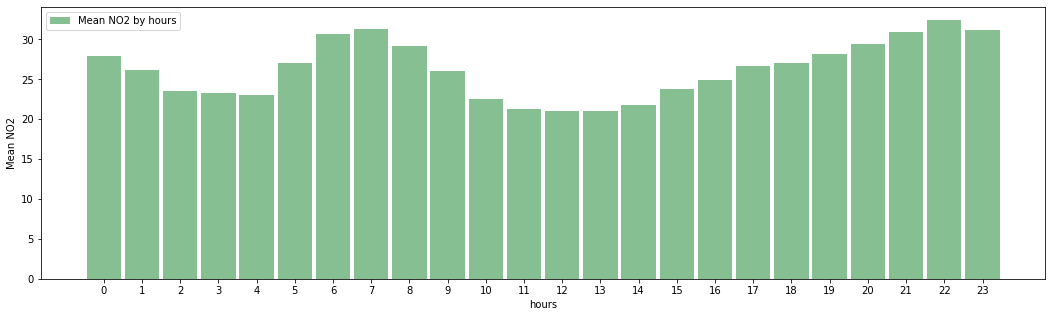

In [121]:
import matplotlib.pyplot as plt
import sklearn as sk, pandas as pd, numpy as np, matplotlib.pyplot as plt
from IPython.display import display, Markdown

ds = pd.read_csv('air_quality_no2_long.csv')

ds["dw"] = pd.to_datetime(ds['date.utc']).dt.day_name()
ds["hh"] = pd.to_datetime(ds['date.utc']).dt.hour
display(ds.head(10))
print('1. Виведіть список унікальних міст з датасету:', ds.city.unique())
print('2. Виведіть дату початку та кінця ведення даних:', pd.to_datetime(ds['date.utc'].min()).strftime('%d/%m/%Y'), '-', pd.to_datetime(ds['date.utc'].max()).strftime('%d/%m/%Y'))
print('3. Яка середня конценрація  𝑁𝑂2  для кожного дня тижня і міста (виведіть таблицю):')
display(Markdown(ds.groupby(["dw","city"]).value.mean().to_markdown()))
print('4. Яке середнє значення для кожної години (виведіть стовбчикову діаграму):')
df = ds.groupby("hh").mean()
df = df.reset_index()
#display(df)
f, ax = plt.subplots(figsize=(18,5))
plt.bar(df.hh,df.value,align='center', color='#86bf91', zorder=2, width=.9, label='Mean NO2 by hours') # A bar chart
ax.set_xticks(df.hh)
plt.xlabel("hours")
plt.ylabel("Mean NO2")
ax.legend()